In [1]:
from scipy.stats import binom, norm
import numpy as np

import matplotlib.pyplot as plt

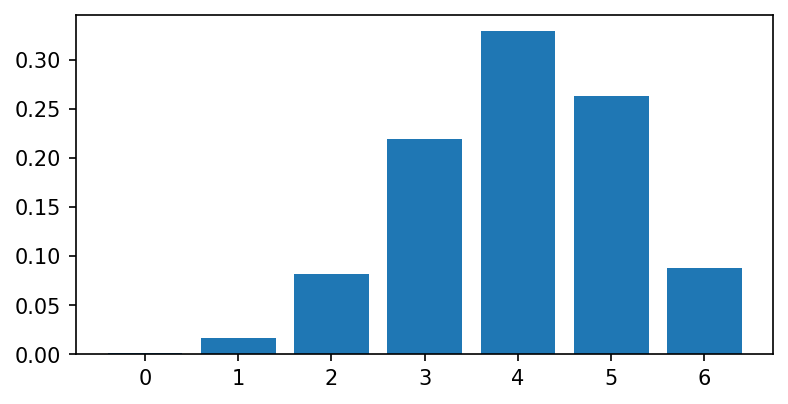

In [2]:
p = 2/3
n = 6

X = binom(n, p)

plt.figure(figsize=(6, 3), dpi=150)
k = np.arange(n+1, dtype=np.int)
plt.bar(k, X.pmf(k))
plt.xticks(k)
plt.show()

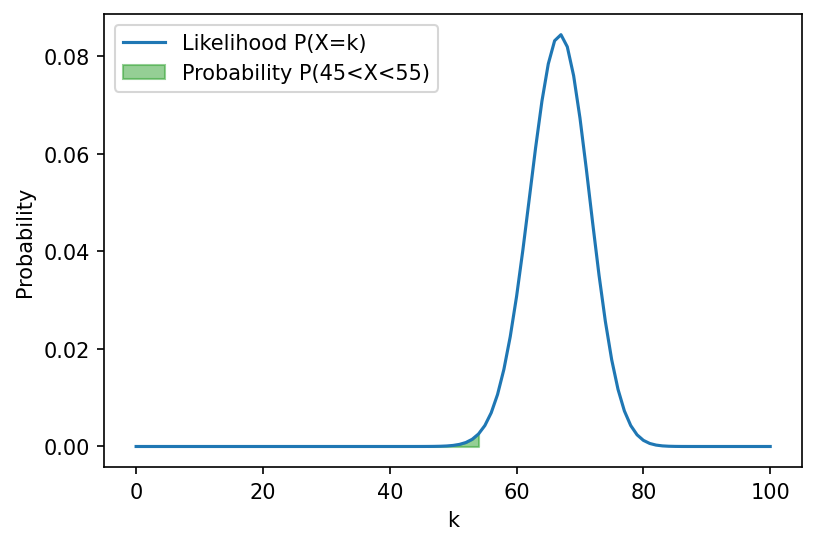

In [7]:
p = 2/3
n = 100

X = binom(n, p)
a = 45
b = 55

plt.figure(figsize=(6, 4), dpi=150)
k = np.arange(n+1, dtype=np.int)
plt.plot(k, X.pmf(k), label="Likelihood P(X=k)")

mask = np.logical_and(a < k, k < b)
plt.fill_between(k[mask], X.pmf(k[mask]), color='C2', alpha=.5, label="Probability P(%i<X<%i)" % (a, b))

plt.xlabel("k")
plt.ylabel("Probability")
plt.legend()
plt.show()

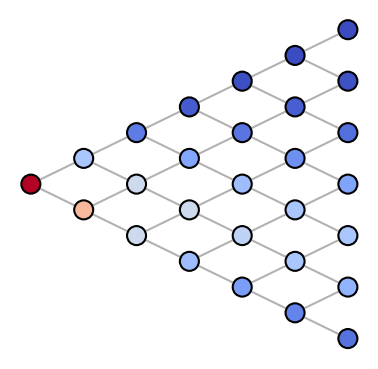

In [4]:
p = 2/3
n = 6

assert n > 1

nodes = np.zeros((np.sum([i+1 for i in range(0, n+1)]), 2))
layers = np.zeros(nodes.shape[0], dtype=np.int)
probabilities = np.zeros(nodes.shape[0])
edges = np.zeros((4, 2*np.sum([i+1 for i in range(0, n)])))

k = 0
l = 0
for i in range(0, n+1): # Layer
  X = binom(i, p)
  for j in range(i+1):  # Node in layer
    y = lambda i, j: .5*i-j
    x = lambda i, j: i*.7
    nodes[k, 0] = y(i, j)
    nodes[k, 1] = x(i, j)
    layers[k] = i
    probabilities[k] = X.pmf(j)
    k += 1
    if i < n: # Don't run on last layer
      edges[:, l]  = np.asarray([y(i, j), y(i+1, j), x(i, j), x(i+1, j)])
      l += 1
      edges[:, l]  = np.asarray([y(i, j), y(i+1, j+1), x(i, j), x(i+1, j+1)])
      l += 1

# Normalise layers
# for layer in layers:
#   probabilities[layers==layer] /= np.max(probabilities[layers==layer])

# Define figure
fig = plt.figure(figsize=(3, 3), dpi=150)
ax = fig.add_subplot(1, 1, 1)
# Plot
ax.plot(edges[2:, :], edges[:2, :], 'k-', zorder=-1, alpha=.3, linewidth=1)
ax.scatter(nodes[:, 1], nodes[:, 0], c=probabilities, 
           s=50/(n*.1), cmap='coolwarm', edgecolors='k')
# Define axis and commit to screen
# ax.axis('equal')
ax.axis('off')
fig.show()